In [12]:
import matplotlib

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.size"] = 9
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams["legend.fontsize"] = 9

import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse
import glob
import os.path

# Read posteriors and plot violins

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


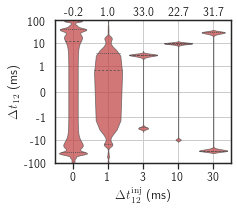

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


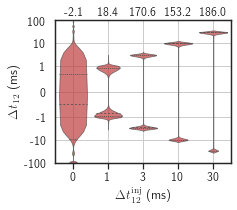

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


In [25]:
for snr in ['10','15','20','30','40']:
    
    snr = str(snr)
    par1='t12'
    par2='lens_angle'
    samples_events_df=pd.read_csv('data/150914_like_samples_snr'+str(snr)+'.csv')
    df_res=pd.read_csv('data/150914_like_BFs_snr'+str(snr)+'.csv')
#     plt.figure()
    fig, axes = plt.subplots(figsize=(3.375, 3))
    ticks = np.arange(5)#5
    #samples_events_df['t12_inj_ms']=#samples_events_df['t12_inj']/1000
    samples_events_df[par1 + '_ms']=samples_events_df[par1]*1000

#     sns.set(font_scale = 1.1)
    sns.set_style('white')
    sns.violinplot(x='t12_inj',y=par1+ '_ms',data=samples_events_df,scale="width",inner="quartile",
                   color="tab:red", linewidth=0.8)
    plt.setp(axes.collections, alpha=0.7)


    axes.set_ylabel('$\Delta t_{12}$ (ms)')
    axes.set_xticks(ticks)
    axes.set_yscale('symlog',linthresh=1)
    axes.set_xticklabels(['0','1','3','10','30'])#,'3'
    axes.set_yticklabels(['-100','-10','-1','0','1','10','100'])
    axes.set_ylim(-100,100)
    axes.grid(which='both')


    ax=axes.twiny()
    ax.set_xlim(axes.get_xlim())
    ax.set_xticks(ticks)
    ax.tick_params(axis ='x',length=0)


#     ax.set_xlabel('$\log \mathcal{B}^{modGR}_{GR}$')
    ax.set_xticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr].values,1).astype('str'))
    axes.set_xlabel('$\Delta t_{12}^\mathrm{inj}$ (ms)')

    plt.tight_layout()
    plt.savefig('figs/PE_150914like_snr'+snr+'_violin.pdf')

    plt.show()

In [ ]:
# vertical violins

plt.figure()
fig, axes = plt.subplots(figsize=(5, 5))
ticks = np.arange(5)#5

# sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(y='t12_inj',x=par1+'_ms',data=samples_events_df,scale="width",inner="quartile",color="C0")
axes.set_xlabel('$\Delta t_{12}(ms)$', fontsize=14)
axes.set_yticks(ticks)
axes.set_xscale('symlog')#,linthresh=1)
axes.set_yticklabels(['0','1','3','10','30'])#,'3'
axes.tick_params(axis='x', which='minor')
axes.set_xticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_xlim(-100,100)
axes.grid(which='both')


ax=axes.twinx()
ax.set_ylim(axes.get_ylim())
ax.set_yticks(ticks)
ax.tick_params(axis ='y',length=0)

ax.set_ylabel('$\log \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_yticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr],2), fontsize=14)
axes.set_ylabel('$\Delta t_{12}^{inj}(ms)$', fontsize=14)

#fig.tight_layout()
plt.savefig('figs/PE_150914like_snr'+snr+'_violin_vertical.pdf')

plt.show()

In [ ]:
# 2D violins, lens_angle included

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), 
                         sharex=True, gridspec_kw=dict(height_ratios=(1, 1), hspace=0))
ticks = np.arange(5)

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(x='t12_inj',y=par1,data=samples_events_df,scale="count",inner="quartile",ax=axes[1],color="orange")
axes[1].set_ylabel('$\Delta t_{12}(s)$', fontsize=14)
axes[1].set_xticks(ticks)
axes[1].set_yscale('symlog',linthresh=0.001)
#axes[1].set_yticks(np.hstack([-(10**np.linspace(-1,-3,3)),0,10**np.linspace(-3,-1,3)]))



sns.violinplot(x='t12_inj',y=par2,data=samples_events_df,scale="count",inner="quartile",ax=axes[0],color="orange")
axes[0].set_ylabel('$\phi_{lens}(rad)$', fontsize=14)
axes[0].set_yticks(np.arange(0, np.pi/2+0.01, np.pi/8))
labels = ['$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$']
axes[0].set_yticklabels(labels)
    
axes[0].set_xticks(ticks)
#axes[0].set_xticklabels(paths_res['Log_BF_NGR_GR'], fontsize=14)
ax=axes[0].twiny()
ax.set_xlim(axes[0].get_xlim())
ax.set_xticks(ticks)
ax.set_xlabel('$\log \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_xticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr],2), fontsize=14)
axes[1].set_xlabel('$\Delta t_{12}^{inj}(s)$', fontsize=14)

fig.tight_layout()
plt.savefig('figs/PE_150914like_snr'+snr+'_violin2d.pdf')

plt.show()

In [ ]:
? sns.violinplot